# 43 - Clustering: Gaussian Mixture Models


* En este Notebook vamos a ver como solucionar problemas de ***Clusterización con la técnica del Gaussian Mixture Models*** y como se implementa.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Gaussian Mixture Models](#M1)
<span></span><br>
    2. [Pseudocódigo del Gaussian Mixture Models](#M2)
<span></span><br>
    3. [Implementación: Gaussian Mixture Models](#M3)
<span></span><br>
    4. [Ejemplo de Clustering con Gaussian Mixture Models](#M4)
<span></span><br>
    5. [Resultados](#M5)


<hr>



# <a name="M1">1. Gaussian Mixture Models</a>


* El ***Gaussian Mixture Models (GMM) es un método estadístico de Clustering similar al K-means, pero con un enfoque probabilístico***. 


* ***Este método asume que todos los objetos (del dataset) han sido generados a partir de ‘k’ distribuciones de probabilidad*** de las cuales desconocemos a priori sus parámetros.


* En la siguiente imagen de ejemplo, podemos ver como los ***dos grupos de objetos (Clusters) se generan de acuerdo a dos distribuciones de probabilidad; por ejemplo dos distribuciones normales*** (gaussianas) p(x|μ,σ) definidas por su media (μ) y su desviación típica (σ):


<img src="./imgs/45_01_gmm.png" style="width: 300px;"/>


* El ***Gaussian Mixture Models (GMM) es la implementación del algoritmo Expectation-Maximization (EM)*** se usa en estadística para encontrar estimadores de máxima verosimilitud de parámetros en modelos probabilísticos que dependen de variables no observables; asumiendo que estos modelos probabilísticos son distribuciones normales de ahí el nombre de Gaussian Mixture Models (Mezcla de Modelos Gausianos, en Español).


* El problema a resolver es por tanto el calcular la probabilidad de pertenencia de un elemento a cada uno de los Cluster. Para ello tenemos lo siguiente:

<span style="font-size:16px">$$P(X,C | \pi, \overrightarrow{\mu}, \overrightarrow{\sigma}) = P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) \cdot P(C|\pi); \; donde\;
\left\{\begin{matrix}
\pi = Probabilidad\;de\;pertenecer\;a\;un\;Cluster\\ 
C = Clusters\\ 
X = Elemento\\ 
\mu = Media\;de\;los\;elementos\;del\;Cluster\\ 
\sigma = Desviación\;típica\;de\;los\;elementos\;del\;Cluster
\end{matrix}\right.$$</span>


* En notación **"plate-notation"** seria lo siguiente:


<img src="./imgs/45_02_gmm.png" style="width: 400px;"/>


* Lo que nos interesa saber es la ***probabilidad de pertenencia de un elemento a cada uno de los Clusters***:

<span style="font-size:20px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma})$$</span>


* Tenemos por otro lado que $𝑃(𝐶│\pi)$ es un valor constante ( $𝑃\;(𝑐=1│\pi_1 ), 𝑃\;(𝑐=2│\pi_2 ), …, 𝑃\;(𝑐=𝑘│\pi_𝑘 )$ ), cosa que nos ayuda a la hora de realizar el cálculo de probabilidades quedando de la siguiente manera:

<span style="font-size:16px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} P(X,C=k | \pi, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  P(X| \overrightarrow{\mu}, \overrightarrow{\sigma})$$</span>
    
    
* Aplicando la función de densidad de una distribución normal, tenemos que la suma de todas las probabilidades de pertenencia de un elemento a los Clusters es:

<span style="font-size:16px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  \frac{1}{\sigma_k \sqrt{2\pi}} \cdot e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}$$</span>


* Podemos simplificar esta probabilidad ya que $\frac{1}{\sqrt{2\pi}}$ es una constante, quedando:

<span style="font-size:16px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}
$$</span>
    
    
* Esto último lo podemos hacer ya que lo que ***nos interesa es asignar el elemento al Cluster con mayor probabilidad***; es decir:

<span style="font-size:20px">$$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$</span>

<hr>


# <a name="M2">2. Pseudocódigo del Gaussian Mixture Models</a>


* El algoritmo del Gaussian Mixture Models funciona de la siguiente manera:

    1. ***Inicialización***: Comienza inicializando los parámetros de las distribuciones de probabilidad $(\mu,\sigma)$ y probabilidades de pertenencia a los Clusters $\pi$
<span></span><br><br>    
    2. ***Expectation-Maximization***, hasta converger o hasta que se cumpla una condición de parada:
 <span></span><br><br>   
        + ***Expectation (Esperanza)***: Con los parámetros conocidos de las distribuciones normales y la probabilidad $\pi$ de pertenencia a un Cluster, asignar cada elemento al Cluster con el mayor valor de probabilidad de pertenencia:
<span></span><br><br>  
$$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$
<span></span><br><br>       
        + ***Maximization (Maximización)***: Calcular para cada Cluster; con los ***'n'*** elementos asignados a cada Cluster, el valor de los parámetros $\pi_k, \mu_k, \sigma_k$ de la siguiente manera:
<span></span><br><br>       
            * $$\pi_k = \frac{Elementos\;en\;el\;Cluster}{Total\;Elementos\;Dataset}$$
<span></span><br><br>
            * $$\mu_k = \frac{1}{n} \sum_{i=1}^{n} x_i$$
<span></span><br><br>
            * $$\sigma_k = \sqrt{\frac{1}{n-1} \cdot \sum_{n=1}^{n} (x_i-\mu_i)^2}$$ 

* Veamos a continuación el Pseudocódigo:



```python
num_clusters = N
num_iteraciones = 100
condicion_parada = False

# Inicializamos los 'N' Clusters
clusters_new = num_cluster * {mean: random, std: 1, prob: 1/num_clusters}

it_counter
while not condicion_parada and it_counter < num_iteraciones:
    
    # Inicializamos una lista de los elementos que formarán el Cluster
    elementos_clusters = [[] for i in range(num_clusters)]
    
    # Creo una variable para guardar el estado de los Clusters Anteriores
    clusters_old = clusters_new
    
    # Expectation
    for elemento in dataset:
        probs_clusters = lista(num_clusters)
        for index, cluster in clusters_old:
            probs_clusters[index] = cluster.prob * 
                                    SUM(e ^ (-1 / 2 * ((x(i) - cluster.mean) ^ 2 / cluster.std ^ 2)) 
                                                        / cluster.std)
        elementos_clusters[argmax(probs_clusters)].append(elemento)
    
    
    # Maximization
    for index, cluster in clusters_old:
        clusters_new[index].mean = cluster.mean
        clusters_new[index].std = cluster.std
        clusters_new[index].prob = len(cluster) / Total Elementos
        
        
    it_counter+= 1

```

<hr>


# <a name="M3">3. Implementación: Gaussian Mixture Models</a>


* En el siguiente fragmento de código está implementado el ***Gaussian Mixture Models***, siguiendo el Pseudocódigo mostrado anteriormente junto con alguna lógica programática adicional.



In [1]:
import numpy as np
import copy
import math


def print_iteration_status(iteracion_num, clusters, elementos_clusters):
    """
    Función que imprime por pantalla el estado de los Clsuters por iteracion
        - iteracion_num: número del epoch.
        - clusters: Valores de las distribuciones de los Clusters
        - elementos_clusters: Elementos que hay en cada Cluster
    """
    print('\nITERATION {}'.format(iteracion_num))
    for index, elem in enumerate(clusters):
        print('\n  Cluster {}'.format(index + 1))
        print('    Número de elementos en el Cluster {}'.format(len(elementos_clusters[index])))
        print('      Distribución: {}'.format(elem))
    print('--------------------------------------------------------------------------------')


def gaussian_mixture_models(X, num_clusters, num_iteraciones, verbose=False):
    """
    Función que devuelve el modelo o hipótesis de la Clusterización (estado final de los Clusters),
    recibiendo como parámetros:
        - X: Elementos
        - num_clusters: Número de Clusters
        - num_iteraciones: Número de Iteraciones máximas a ejecutar
        - verbose: Boolean para indicar si queremos imprimir por pantalla el estado de la iteracion
    """
    # Inicializamos los parámetros de los clusters
    clusters_new = [{'mean': X[np.random.choice(X.shape[0])],
                     'std': np.ones(X.shape[1]),
                     'prob': 1 / num_clusters,
                     'converge': False} for i in range(num_clusters)]

    converge = False
    it_counter = 0
    while (not converge) and (it_counter < num_iteraciones):

        # Inicializamos una lista de los elementos que formarán el Cluster
        elementos_clusters = [[] for i in range(num_clusters)]

        # Creamos una copia de los centroides de la iteración anterior
        clusters_old = copy.deepcopy(clusters_new)

        # Expectation (Asignación)
        for elem in X:
            # prob * SUM(e ^ (-1 / 2 * ((x(i) - mean) ^ 2 / std ^ 2)) / std)
            probs_clusters = np.zeros(len(clusters_old))
            for index, cluster in enumerate(clusters_old):
                prob = 1.0
                for i, e in enumerate(elem):
                    prob *= (math.exp(-0.5 * (math.pow((e - clusters_old[index]['mean'][i]), 2) /
                                              math.pow(clusters_old[index]['std'][i], 2))) / 
                                                       clusters_old[index]['std'][i])
                probs_clusters[index] = prob * clusters_old[index]['prob']
            elementos_clusters[np.argmax(probs_clusters)].append(elem)

        # Maximization (Actualización)
        for index, centroide in enumerate(clusters_old):
            clusters_new[index]['mean'] = np.mean(elementos_clusters[index], axis=0)
            clusters_new[index]['std'] = np.std(elementos_clusters[index], axis=0)
            clusters_new[index]['prob'] = len(elementos_clusters[index]) / float(len(X))
            clusters_new[index]['converge'] = np.array_equal(clusters_new[index]['mean'], clusters_old[index]['mean'])

        # Condición de parada, si los Nuevos centroides son iguales que los anteriores
        converge = [clusters_new[index]['converge'] for index, elem in enumerate(clusters_new)].count(False) == 0

        # Incremento Iteracion
        it_counter += 1

        # Imprimimos por pantalla el estado de los Clusters
        if verbose:
            print_iteration_status(it_counter, clusters_new, elementos_clusters)
        
    return clusters_new, elementos_clusters

<hr>


# <a name="M4">4. Ejemplo de Clustering con Gaussian Mixture Models</a>



* Dado un ***conjunto de datos*** que tiene dos variables numéricas, vamos a agruparlas en 3 grupos o Clusters.


* Este conjunto de datos se encuentra en: ***'./data/DS_3Clusters_999Puntos.txt'***


* En primer lugar vamos a cargar los datos.


In [2]:
import pandas as pd

df = pd.read_table('./data/DS_3Clusters_999Puntos.txt', sep='::', header=None, names=['X1', 'X2'], engine='python')
df.sample(4)

,X1,X2
68,2.357526,3.760249
24,1.971106,3.980642
484,2.052296,3.907201
189,5.602543,2.760227


* Dado que el Gaussian Mixture Models es un algoritmo probabilístico, vamos a representar las distribuciones de cada una de las variables en un histograma.


* Se puede apreciar como los datos no sigue una distribución normal (gaussiana) y dividiendo los datos en grupos, estos podrían seguir distribuciones normales independientes:

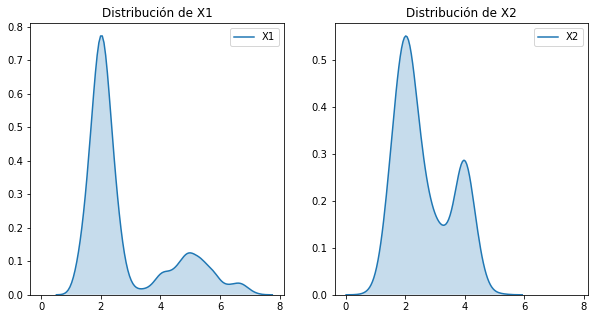

In [3]:
# importamos las librerías
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# Dibujamos las distribuciones de las 2 variables
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.kdeplot(df['X1'], shade=True, ax=axes[0])
sns.kdeplot(df['X2'], shade=True, ax=axes[1])
axes[0].title.set_text('Distribución de X1')
axes[1].title.set_text('Distribución de X2')

* Vamos a ejecutar el K-Means para obtener los centroides de los clusters pasandole los siguientes parámetros:
    + ***Número de Clusters*** = 3
    + ***Número Máximo de Iteracciones*** = 100

In [4]:
# Leemos los datos
X = np.loadtxt('./data/DS_3Clusters_999Puntos.txt', delimiter='::')

# Ejecutamos el k_means
np.random.seed(1)
clusters, elementos_cluster = gaussian_mixture_models(X=X, num_clusters=3, num_iteraciones=100, verbose=True)


ITERATION 1

  Cluster 1
    Número de elementos en el Cluster 561
      Distribución: {'mean': array([1.968402  , 2.15292836]), 'std': array([0.32843928, 0.56185994]), 'prob': 0.5615615615615616, 'converge': False}

  Cluster 2
    Número de elementos en el Cluster 147
      Distribución: {'mean': array([2.00243953, 4.09445674]), 'std': array([0.25188547, 0.18104223]), 'prob': 0.14714714714714713, 'converge': False}

  Cluster 3
    Número de elementos en el Cluster 291
      Distribución: {'mean': array([4.68543947, 2.83052368]), 'std': array([1.18070924, 0.90093993]), 'prob': 0.2912912912912913, 'converge': False}
--------------------------------------------------------------------------------

ITERATION 2

  Cluster 1
    Número de elementos en el Cluster 566
      Distribución: {'mean': array([2.01150177, 2.01695728]), 'std': array([0.36184712, 0.40250796]), 'prob': 0.5665665665665666, 'converge': False}

  Cluster 2
    Número de elementos en el Cluster 181
      Distribución: {

* Vamos a mostrar el estado final de los Clusters y el número de elementos que hay en cada uno de ellos:

In [5]:
print('RESULTADO FINAL:')
print_iteration_status(iteracion_num='-', clusters=clusters, elementos_clusters=elementos_cluster)

RESULTADO FINAL:

ITERATION -

  Cluster 1
    Número de elementos en el Cluster 571
      Distribución: {'mean': array([2.02788518, 2.0046025 ]), 'std': array([0.37849705, 0.38147472]), 'prob': 0.5715715715715716, 'converge': True}

  Cluster 2
    Número de elementos en el Cluster 186
      Distribución: {'mean': array([1.99675985, 4.01852586]), 'std': array([0.25283376, 0.22137621]), 'prob': 0.18618618618618618, 'converge': True}

  Cluster 3
    Número de elementos en el Cluster 242
      Distribución: {'mean': array([5.09411261, 3.0631674 ]), 'std': array([0.82251   , 0.79567349]), 'prob': 0.24224224224224225, 'converge': True}
--------------------------------------------------------------------------------


<hr>


# <a name="M5">5. Resultados</a>


* Vamos a continuación a ver las distribuciones de cada una de las variables de los elementos asignados a cada Cluster para ver si el Gaussian Mixture Models ha conseguido extraer las diferentes distribuciones de los datos.


* Para ellos vamos a ***asignar cada elemento del Dataset al Cluster que tiene mayor probabilidad de pertenencia usando el modelo generado*** por el Gaussian Mixture Models; es decir,
    + Media del Cluster
    + Desviación típica del Cluster
    + Probabilidad de pertenencia al Cluster
    
    
* Por último vamos a dibujar las distribuciones de los elementos de cada Cluster en el que se puede apreciar como se distinguen las 3 distribuciones normales de cada Cluster por variable.

In [6]:
# Inicializamos una lista para guardar el cluster al que se asigna cada elemento
labels = []

# Recorremos la lista de elementos y los asignamos al cluster con mayor probabilidad
for elem in X:
    probs_clusters = np.zeros(len(clusters))
    for index, cluster in enumerate(clusters):
        prob = 1.0
        for i, e in enumerate(elem):
            prob *= (math.exp(-0.5 * (math.pow((e - clusters[index]['mean'][i]), 2) /
                                      math.pow(clusters[index]['std'][i], 2))) / 
                                               clusters[index]['std'][i])
            probs_clusters[index] = prob * clusters[index]['prob']
    labels.append(np.argmax(probs_clusters))
 
 # Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))

* Una vez asignados los elementos a cada Cluster, procedemos a dibujar las distribuciones de las variables:

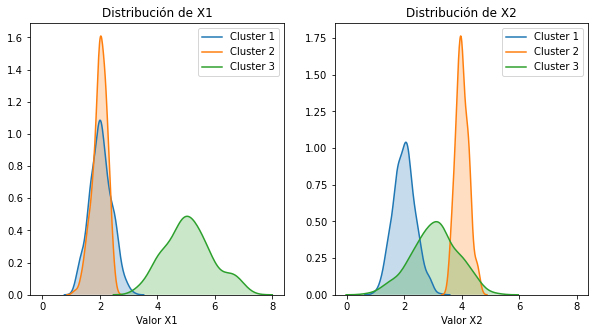

In [7]:
# Dibujamos las distribuciones de las 2 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
plt_position = [axes[0], axes[1]]
for index, col in enumerate(df.columns.drop('label')):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Valor {}'.format(col))

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">